### Dog vs Cat Classification

In [ ]:
# Dataset - https://www.kaggle.com/datasets/salander/dogs-vs-cats

## Kaggle dataset

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:14<00:00, 181MB/s]
100% 1.06G/1.06G [00:14<00:00, 81.0MB/s]


In [ ]:
# extracting zip file
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# importing libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#Training data and validation data from directory
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256),
    seed=12
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256),
    seed=12
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
len(train_ds)

625

In [ ]:
# Checking training data
for i in train_ds:
  x = i
  break

In [ ]:
x[1]

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0], dtype=int32)>

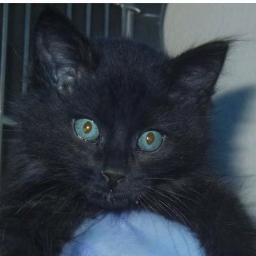

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(x[0][0].numpy())

In [ ]:
for i in train_ds:
  x = i[0][0]
  y = i[-1][0]
  break

In [ ]:
print(y)

tf.Tensor(1, shape=(), dtype=int32)


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

## Base model

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 128)       0

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 103ms/step - loss: 0.6025 - Accuracy: 0.6730 - val_loss: 0.5438 - val_Accuracy: 0.7178
Epoch 2/10
625/625 [==============================] - 57s 91ms/step - loss: 0.4753 - Accuracy: 0.7688 - val_loss: 0.4398 - val_Accuracy: 0.7966
Epoch 3/10
625/625 [==============================] - 56s 89ms/step - loss: 0.3660 - Accuracy: 0.8328 - val_loss: 0.4428 - val_Accuracy: 0.7994
Epoch 4/10
625/625 [==============================] - 53s 84ms/step - loss: 0.2476 - Accuracy: 0.8964 - val_loss: 0.5402 - val_Accuracy: 0.7996
Epoch 5/10
625/625 [==============================] - 56s 88ms/step - loss: 0.1445 - Accuracy: 0.9440 - val_loss: 0.7196 - val_Accuracy: 0.8106
Epoch 6/10
625/625 [==============================] - 52s 83ms/step - loss: 0.0881 - Accuracy: 0.9657 - val_loss: 0.8773 - val_Accuracy: 0.7972
Epoch 7/10
625/625 [==============================] - 51s 81ms/step - loss: 0.0628 - Accuracy: 0.9778 - val_loss: 0.9822 - val_Accuracy

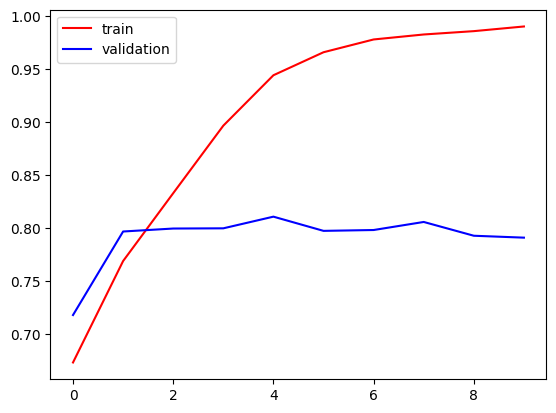

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['Accuracy'],color='red',label='train')
plt.plot(history.history['val_Accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

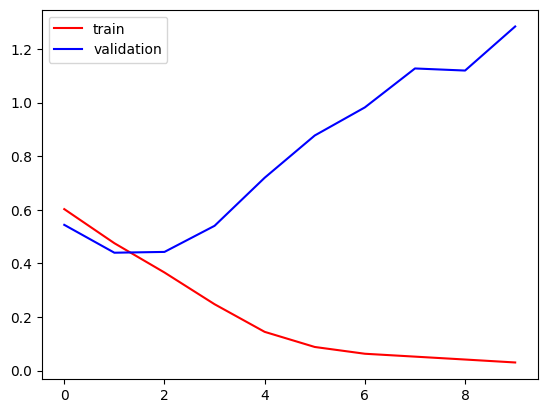

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# Dropout
# Batch Norm
# Reduce complexity

In [ ]:
# create CNN model

model1 = Sequential()

model1.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(256,256,3)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2),strides=2))

model1.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2),strides=2))

model1.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2),strides=2))

model1.add(Flatten())

model1.add(Dense(128,activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(64,activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(1,activation='sigmoid'))

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 256, 256, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 128, 128, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 128, 128, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model1.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 105ms/step - loss: 1.3395 - accuracy: 0.5570 - val_loss: 0.6664 - val_accuracy: 0.5878
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.6656 - accuracy: 0.5899 - val_loss: 0.6613 - val_accuracy: 0.5638
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.6298 - accuracy: 0.6387 - val_loss: 0.6339 - val_accuracy: 0.6224
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5671 - accuracy: 0.7124 - val_loss: 0.6149 - val_accuracy: 0.6616
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5166 - accuracy: 0.7549 - val_loss: 0.5528 - val_accuracy: 0.7296
Epoch 6/10
625/625 [==============================] - 62s 99ms/step - loss: 0.4962 - accuracy: 0.7715 - val_loss: 0.6958 - val_accuracy: 0.6100
Epoch 7/10
625/625 [==============================] - 63s 101ms/step - loss: 0.4859 - accuracy: 0.7796 - val_loss: 0.6261 - val_acc

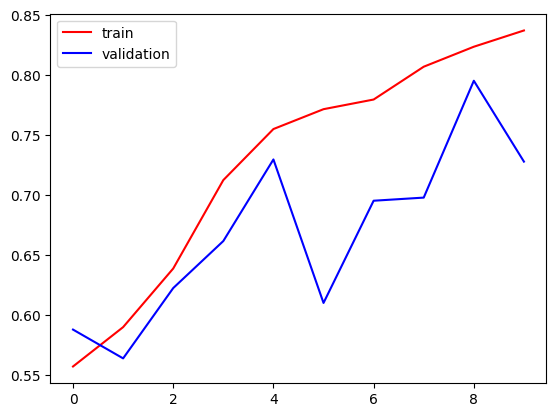

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

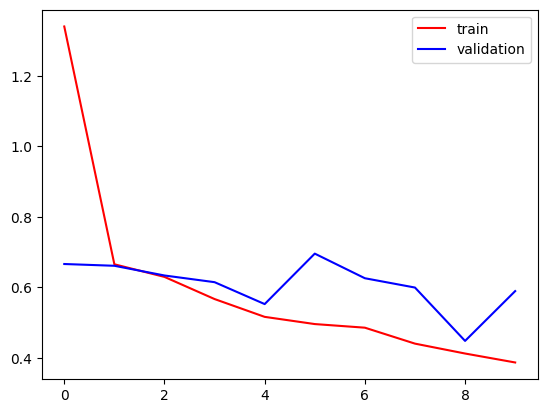

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# Saving the model
model1.save('model_iteration_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# To load the model back
new_model = keras.models.load_model('model_iteration_1.h5')

In [ ]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 256, 256, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 128, 128, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 128, 128, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/cat2.jpg')

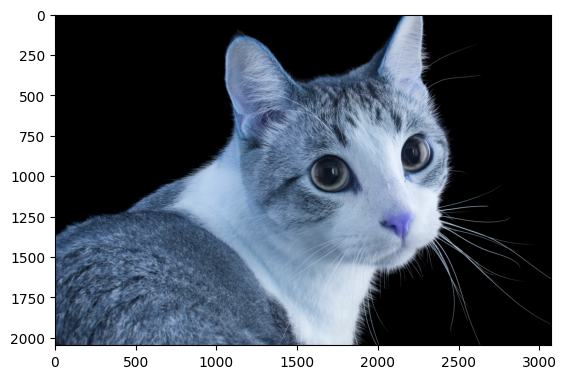

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(test_img)

In [ ]:
test_img.shape

(2048, 3072, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
test_input.shape

(1, 256, 256, 3)

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 375ms/step


array([[0.9825644]], dtype=float32)

## Testing

In [ ]:
test_img = cv2.imread('/content/dog.jpg')

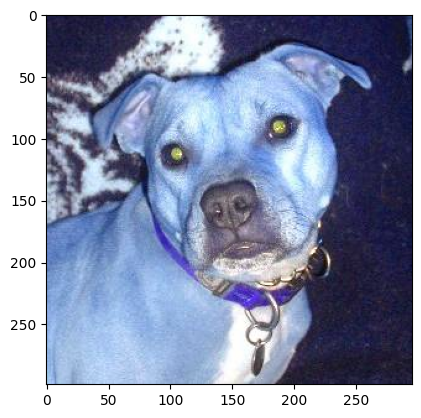

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(test_img)

In [ ]:
test_img.shape

(299, 296, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 52ms/step


array([[1.]], dtype=float32)

## Data Augmentation

Single image example

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(256,256,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.2),
  ]
)

In [ ]:
# from keras.preprocessing import image
# from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# img = image.load_img('/content/cat2.jpg', target_size=(200,200))

In [ ]:
# img

In [ ]:
# datagen = ImageDataGenerator(
#     rotation_range=30,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
# )

In [ ]:
# img = image.img_to_array(img)

In [ ]:
# img.shape

In [ ]:
# input_batch = img.reshape(1,200,200,3)

In [ ]:
# i = 0

# for output in datagen.flow(input_batch, batch_size=1, save_to_dir='/content/dogs_vs_cats'):

#   i = i + 1

#   if i == 5:
#     break

Whole directory

In [ ]:
# batch_size = 16

# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     shear_range=0.2,
#     rotation_range=30,
#     width_shift_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True
# )

# test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#     '/content/train',
#     target_size = (150,150),
#     batch_size=batch_size,
#     class_mode='binary'
# )

# validation_generator = test_datagen.flow_from_directory(
#     '/content/test',
#     target_size = (150,150),
#     batch_size=batch_size,
#     class_mode='binary'
# )

In [ ]:
# create CNN model

model = Sequential()

model.add(data_augmentation)

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))


model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 256, 256, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 128, 128, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 batch_normalization_7 (Bat  (None, 128, 128, 64)     

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 66s 100ms/step - loss: 1.0496 - accuracy: 0.5409 - val_loss: 0.6799 - val_accuracy: 0.5384
Epoch 2/10
625/625 [==============================] - 60s 96ms/step - loss: 0.6469 - accuracy: 0.6119 - val_loss: 0.6263 - val_accuracy: 0.6616
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.6066 - accuracy: 0.6597 - val_loss: 0.5562 - val_accuracy: 0.7150
Epoch 4/10
625/625 [==============================] - 63s 100ms/step - loss: 0.5649 - accuracy: 0.7039 - val_loss: 0.6178 - val_accuracy: 0.6494
Epoch 5/10
625/625 [==============================] - 59s 94ms/step - loss: 0.5270 - accuracy: 0.7260 - val_loss: 0.4706 - val_accuracy: 0.7838
Epoch 6/10
625/625 [==============================] - 60s 96ms/step - loss: 0.5008 - accuracy: 0.7539 - val_loss: 0.5479 - val_accuracy: 0.7300
Epoch 7/10
625/625 [==============================] - 63s 100ms/step - loss: 0.4850 - accuracy: 0.7638 - val_loss: 0.7199 - val_accur

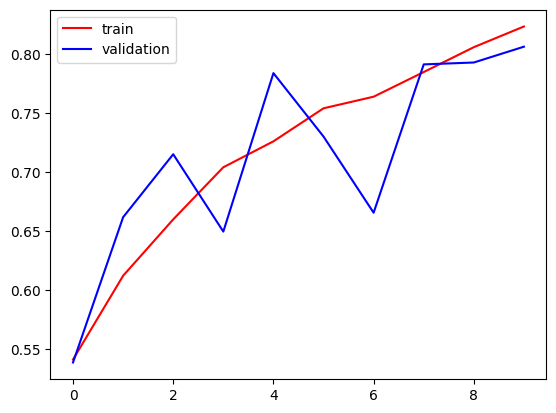

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

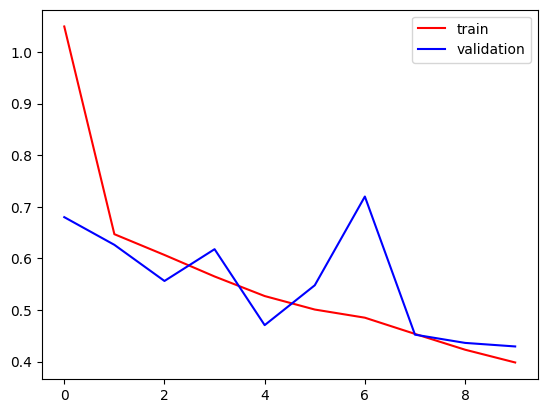

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()